In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
#connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset_B_training.csv')
df.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,h1n1_vaccine
0,1,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",2.0,1.0,construction,0
1,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Female,Below Poverty,Not Married,Own,Employed,Non-MSA,0.0,3.0,wholesale,0
2,3,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,real_estate,1
3,4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,Non-MSA,0.0,0.0,NaN,0
4,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Female,NaN,Not Married,NaN,Unemployed,Non-MSA,3.0,0.0,NaN,0


In [ ]:
# ---- File locations (change if needed)
TRAIN_PATH = "/content/drive/MyDrive/dataset_B_training.csv"

df = pd.read_csv(TRAIN_PATH)
print("\nTrain shape:", df.shape)
print("Columns:", list(df.columns))


Train shape: (4756, 31)
Columns: ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'household_adults', 'household_children', 'employment_sector', 'h1n1_vaccine']


In [ ]:
print(df.describe())

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count     4756.00000   4741.000000     4734.000000                4739.000000   
mean      2378.50000      1.658933        1.307140                   0.057396   
std       1373.08327      0.892478        0.612811                   0.232622   
min          1.00000      0.000000        0.000000                   0.000000   
25%       1189.75000      1.000000        1.000000                   0.000000   
50%       2378.50000      2.000000        1.000000                   0.000000   
75%       3567.25000      2.000000        2.000000                   0.000000   
max       4756.00000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count           4729.000000           4752.000000            4748.000000   
mean               0.740960              0.077652               0.842039   
std                0.438154              0

In [ ]:
# =========================
# Basic EDA
# =========================
print("\n--- Basic EDA ---")
print(df.dtypes)
print("\nTarget value counts:\n", df["h1n1_vaccine"].value_counts(dropna=False))

missing = df.isna().sum().sort_values(ascending=False)
print("\nTop missing values:\n", missing.head(30))


--- Basic EDA ---
respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employ

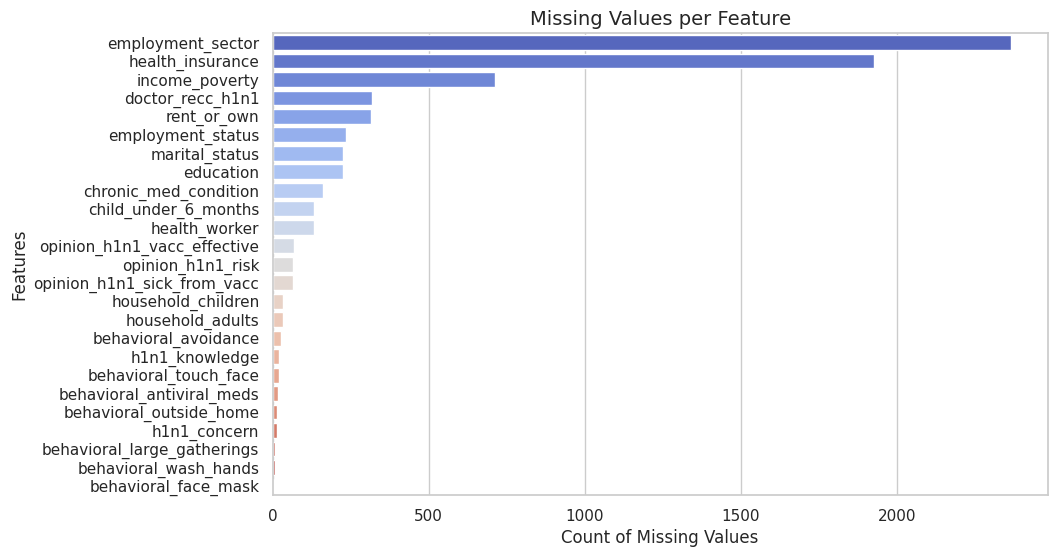

,Missing_Count,Missing_%
age_group,NaN,0.00
behavioral_antiviral_meds,17.0,0.36
behavioral_avoidance,27.0,0.57
behavioral_face_mask,4.0,0.08
behavioral_large_gatherings,9.0,0.19
behavioral_outside_home,15.0,0.32
behavioral_touch_face,20.0,0.42
behavioral_wash_hands,8.0,0.17
census_msa,NaN,0.00
child_under_6_months,134.0,2.82



Data types summary:
float64    19
object     10
int64       2
Name: count, dtype: int64

Numeric columns: ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults', 'household_children', 'h1n1_vaccine']

Categorical columns: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa', 'employment_sector']


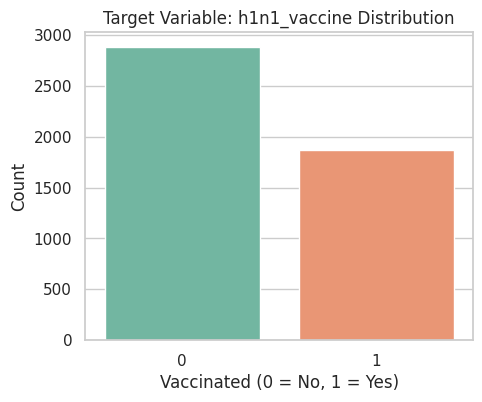

Vaccination Rate: 39.40% of respondents


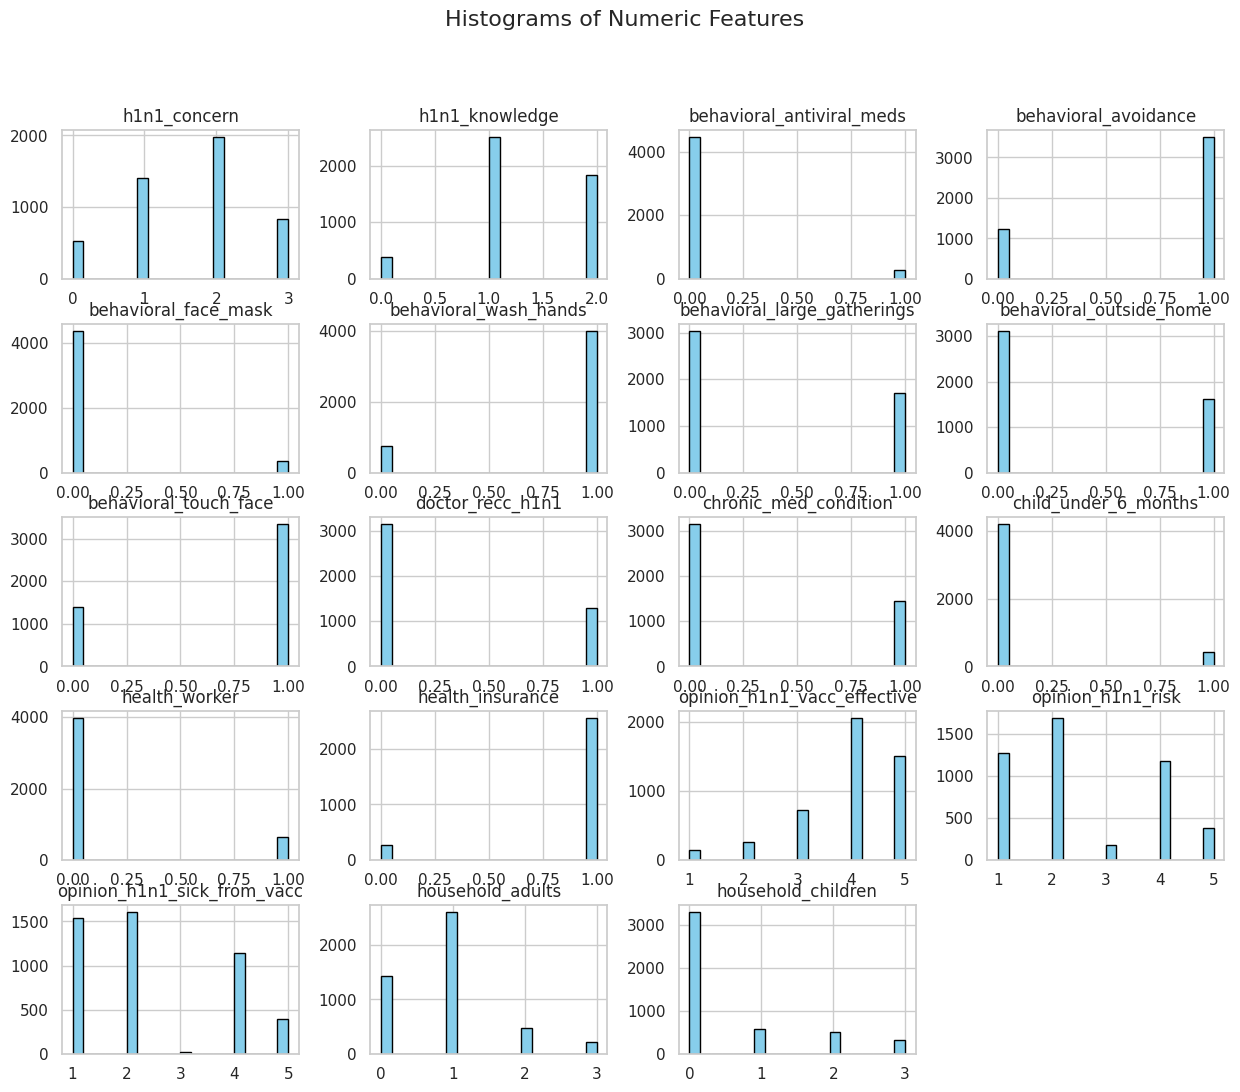

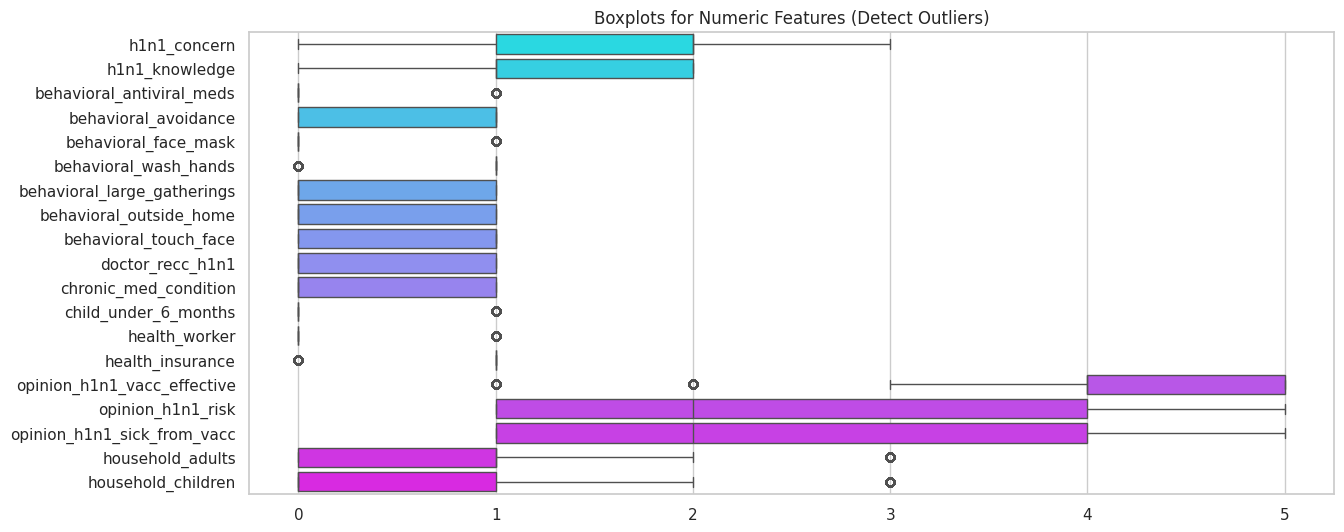

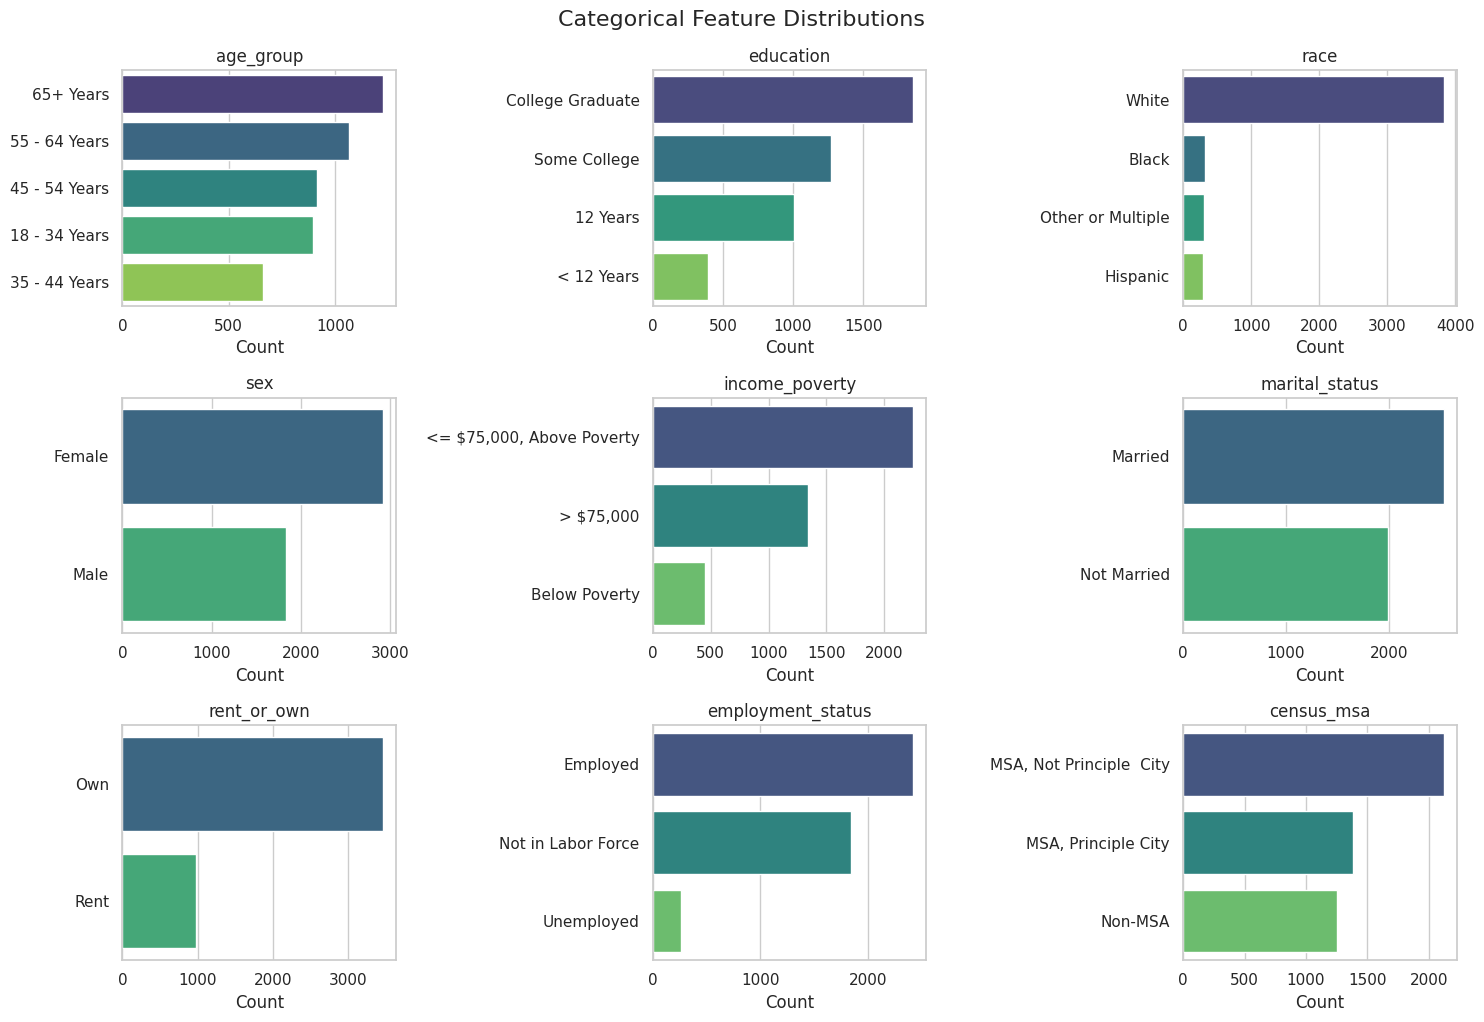

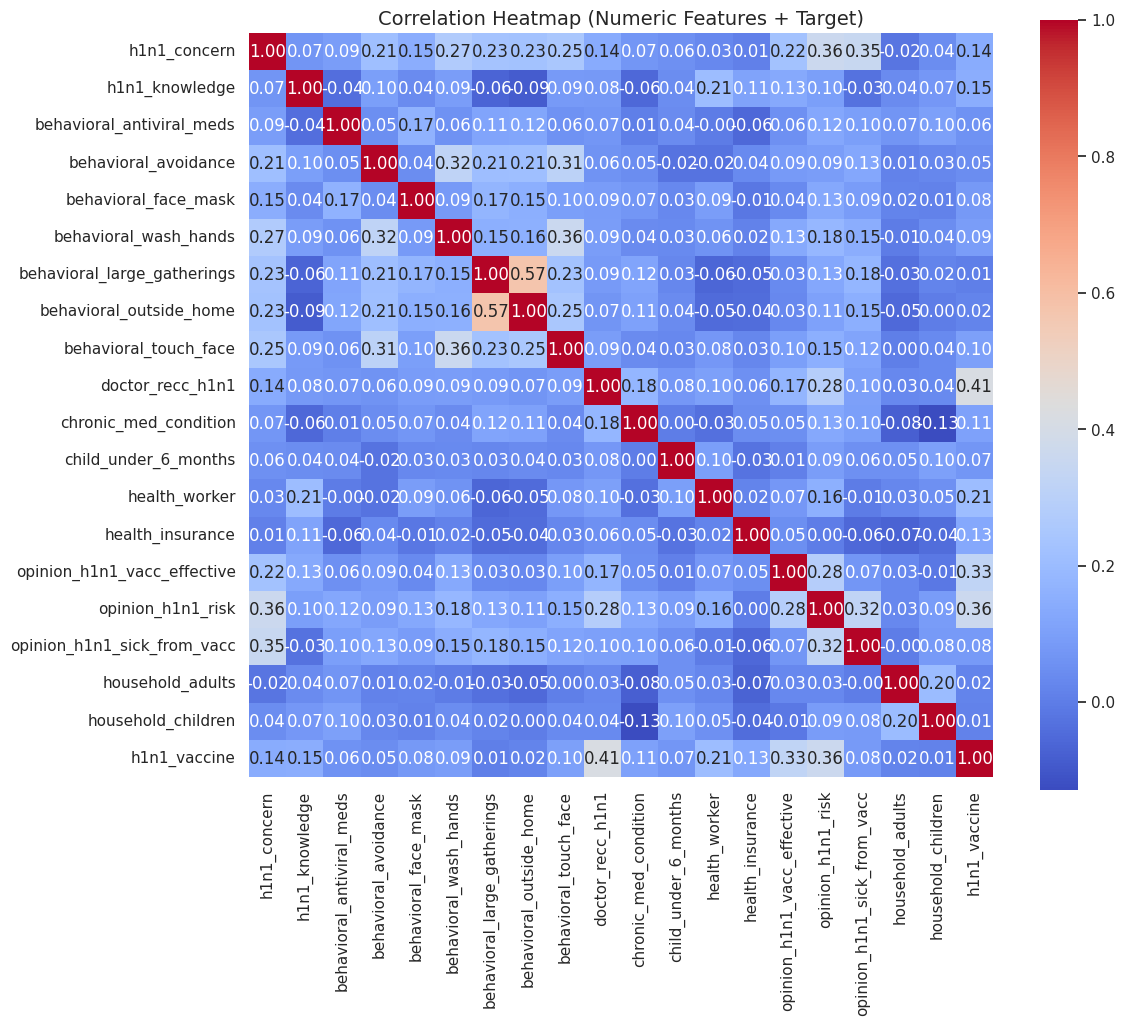


Correlation with target (h1n1_vaccine):


,h1n1_vaccine
doctor_recc_h1n1,0.413874
opinion_h1n1_risk,0.362183
opinion_h1n1_vacc_effective,0.325057
health_worker,0.205428
h1n1_knowledge,0.148766
h1n1_concern,0.143235
health_insurance,0.129246
chronic_med_condition,0.107138
behavioral_touch_face,0.103222
behavioral_wash_hands,0.092827


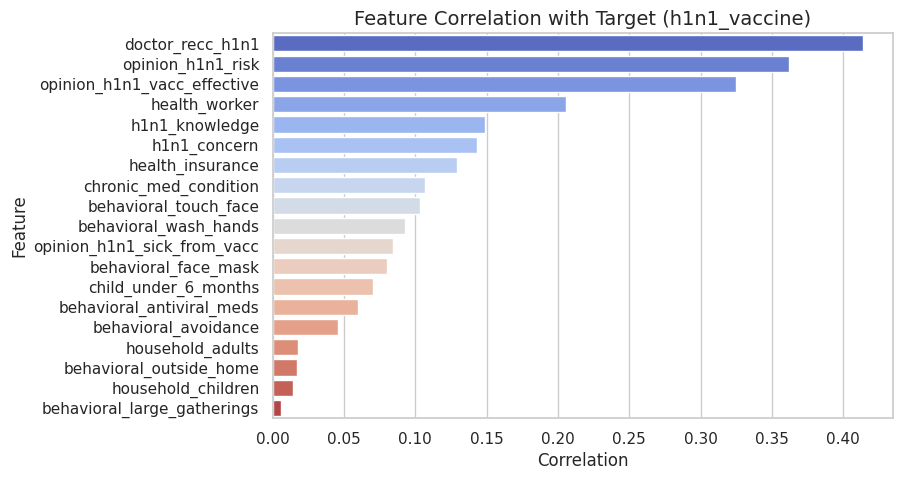

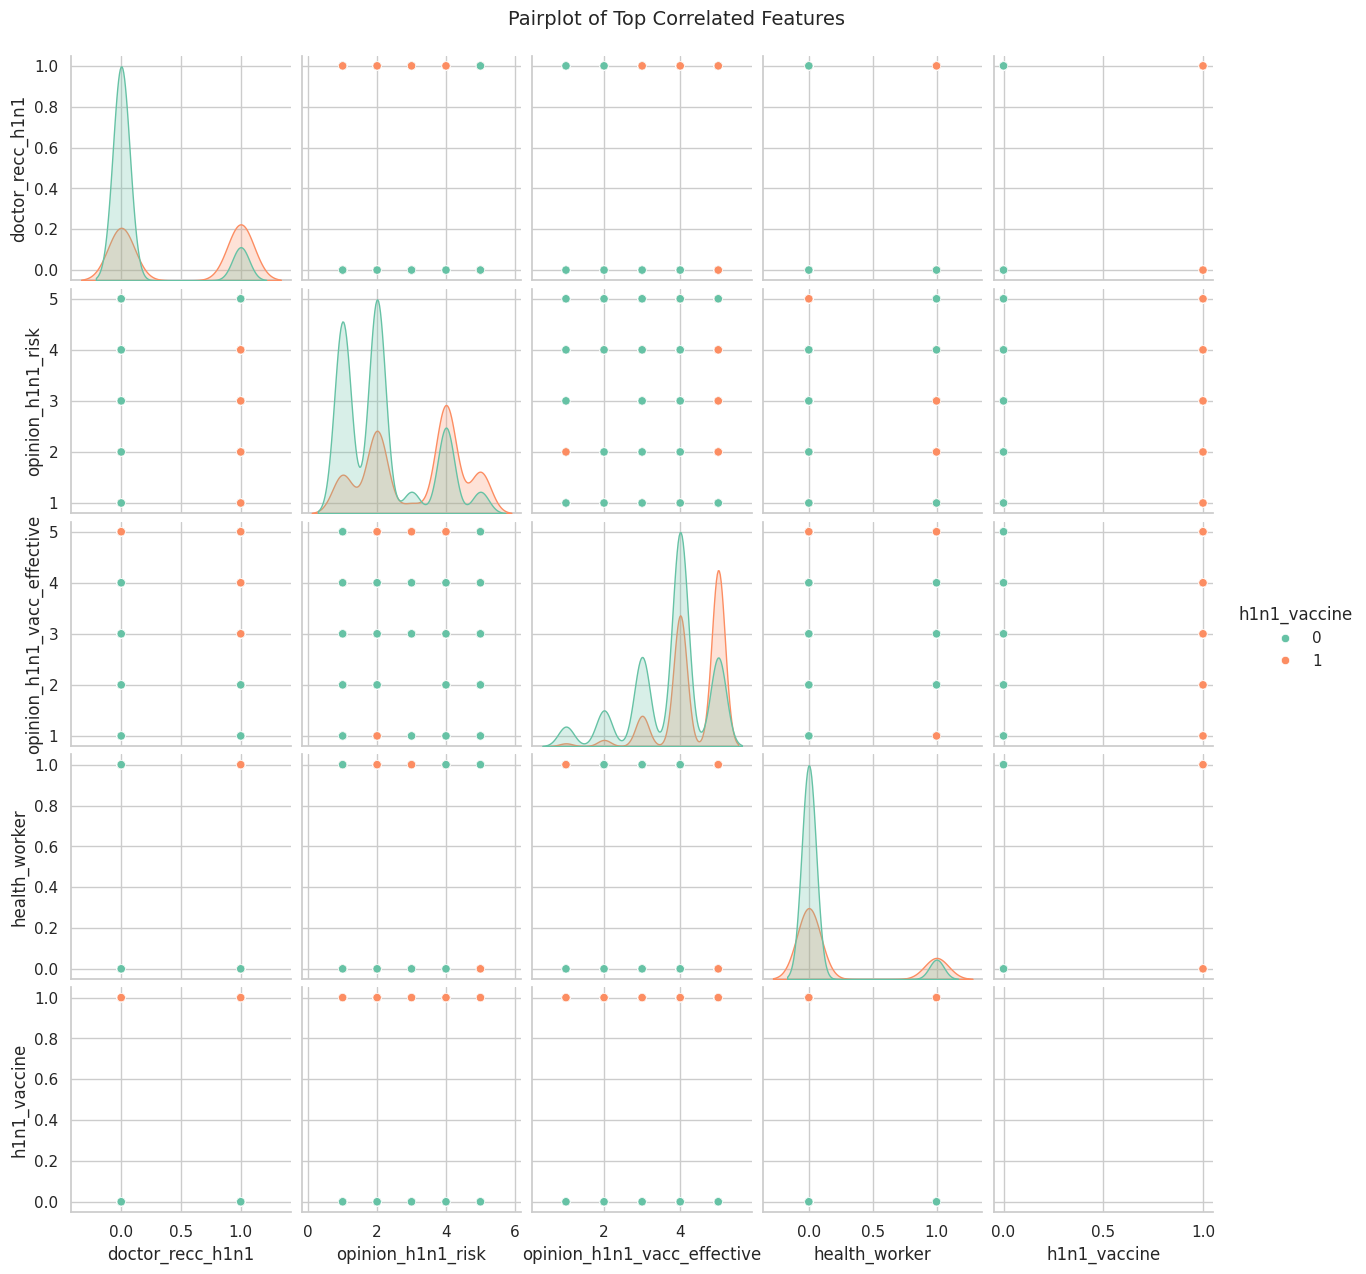

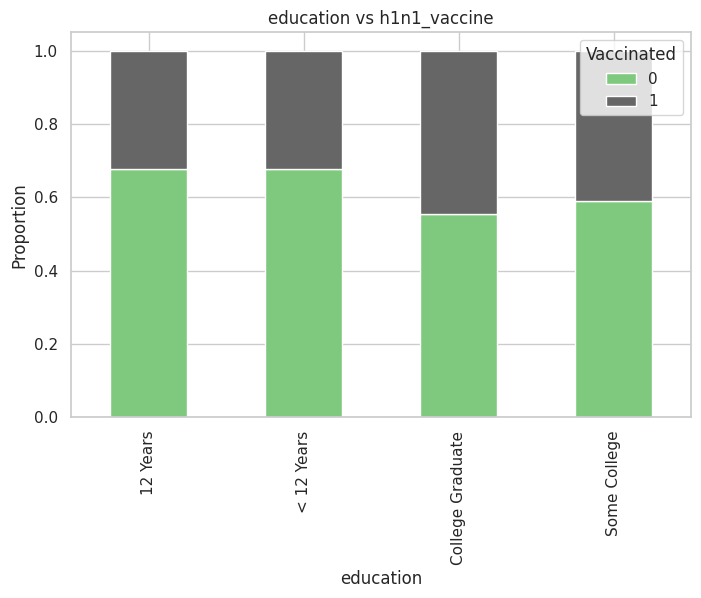

In [ ]:
# ======================================
# Exploratory Data Analysis (EDA)
# ======================================

# Set plot style
sns.set(style="whitegrid", palette="pastel")

# --------------------------------------
# 1Missing Value Visualization
# --------------------------------------
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, palette="coolwarm")
plt.title("Missing Values per Feature", fontsize=14)
plt.xlabel("Count of Missing Values")
plt.ylabel("Features")
plt.show()

# Percentage of missing values
missing_percent = (df.isna().mean() * 100).sort_values(ascending=False)
display(pd.DataFrame({
    "Missing_Count": missing,
    "Missing_%": missing_percent.round(2)
}).head(20))

# --------------------------------------
#  Data Type Overview
# --------------------------------------
print("\nData types summary:")
print(df.dtypes.value_counts())

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols]

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)

# --------------------------------------
# Target Distribution
# --------------------------------------
plt.figure(figsize=(5,4))
sns.countplot(x='h1n1_vaccine', data=df, palette="Set2")
plt.title("Target Variable: h1n1_vaccine Distribution")
plt.xlabel("Vaccinated (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

vacc_rate = df["h1n1_vaccine"].mean() * 100
print(f"Vaccination Rate: {vacc_rate:.2f}% of respondents")

# --------------------------------------
# Numeric Feature Distributions
# --------------------------------------
numeric_to_plot = [col for col in numeric_cols if col not in ['respondent_id', 'h1n1_vaccine']]

df[numeric_to_plot].hist(figsize=(15,12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

# Boxplots for numeric features (outlier visualization)
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_to_plot], orient="h", palette="cool")
plt.title("Boxplots for Numeric Features (Detect Outliers)")
plt.show()

# --------------------------------------
# Categorical Feature Distributions
# --------------------------------------
cat_sample = categorical_cols[:9]  # Plot first 9 categorical for clarity
fig, axes = plt.subplots(3, 3, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(cat_sample):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i], palette="viridis")
    axes[i].set_title(col)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("Count")

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions", fontsize=16, y=1.02)
plt.show()

# --------------------------------------
# Correlation Matrix (Numeric Only)
# --------------------------------------
corr_matrix = df[numeric_to_plot + ['h1n1_vaccine']].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Numeric Features + Target)", fontsize=14)
plt.show()

# Target correlations
target_corr = corr_matrix['h1n1_vaccine'].drop('h1n1_vaccine').sort_values(ascending=False)
print("\nCorrelation with target (h1n1_vaccine):")
display(target_corr)

plt.figure(figsize=(8,5))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Feature Correlation with Target (h1n1_vaccine)", fontsize=14)
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

# --------------------------------------
#  Pairplot (Top correlated numeric features)
# --------------------------------------
top_corr_features = target_corr.abs().sort_values(ascending=False).head(4).index.tolist()
sns.pairplot(df, vars=top_corr_features + ['h1n1_vaccine'], hue='h1n1_vaccine', palette="Set2")
plt.suptitle("Pairplot of Top Correlated Features", fontsize=14, y=1.02)
plt.show()

# --------------------------------------
# Crosstab Example (Categorical vs Target)
# --------------------------------------
cat_example = 'education'  # change to other categorical features if needed
if cat_example in df.columns:
    cross_tab = pd.crosstab(df[cat_example], df['h1n1_vaccine'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Accent')
    plt.title(f"{cat_example} vs h1n1_vaccine")
    plt.ylabel("Proportion")
    plt.xlabel(cat_example)
    plt.legend(title='Vaccinated', loc='upper right')
    plt.show()


In [ ]:
!pip install h2o

 Data loaded successfully. Shape: (4756, 31)
 10 categorical | 19 numeric columns
 Performing MICE Imputation...
 MICE Imputation Completed.
 Cleaned imputed dataset saved to:
/content/drive/MyDrive/dataset_B_training_imputed_hybrid.csv
Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 21 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.8
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_1fuvj5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.975 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
 Split done: train (3819, 31) | valid (937, 31)
AutoML progress: |
21:15:19.401: Project: AutoML_2_20251024_211519
21:15:19.401: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
21:15:19.401: Setting stopping tolerance adaptively based on the training frame: 0.01618173820945837
21:15:19.402: Build control seed: 42
21:15:19.402: training frame: Frame key: AutoML_2_20251024_211519_training_py_18_sid_94a3    cols: 31    rows: 3819  chunks: 8    size: 260405  checksum: 6266050151574059088
21:15:19.402: validation frame: Frame key: py_19_sid_94a3    cols: 31    rows: 937  chunks: 8    size: 111155  

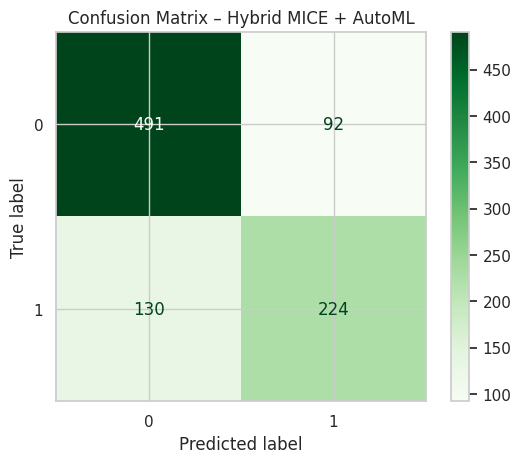


Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.7907    0.8422    0.8156       583
           1     0.7089    0.6328    0.6687       354

    accuracy                         0.7631       937
   macro avg     0.7498    0.7375    0.7421       937
weighted avg     0.7598    0.7631    0.7601       937


 Generating predictions on test dataset...
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Final submission file saved to:
/content/drive/MyDrive/challenge_submission_group_2_order_1.csv


In [ ]:
# ============================================================
# Hybrid MICE Imputation (BayesianRidge)
# + H2O AutoML for Prediction (F1 Optimized)
# ============================================================

# --- Import libraries
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import BayesianRidge
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import os

# ---------- Step 1: Load Dataset
df = pd.read_csv("/content/drive/MyDrive/dataset_B_training.csv")
print(" Data loaded successfully. Shape:", df.shape)

id_col = "respondent_id"
target_col = "h1n1_vaccine"

# Separate ID and Target
df_id = df[[id_col]]
y = df[target_col]
X = df.drop(columns=[id_col, target_col])

# ---------- Step 2: Identify Column Types
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(f" {len(categorical_cols)} categorical | {len(numeric_cols)} numeric columns")

# ---------- Step 3: Encode Categorical Variables
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = X[col].astype(str)
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# ---------- Step 4: Scale Numeric Features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# ---------- Step 5: MICE Imputation (BayesianRidge)
mice_imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=40,
    random_state=42,
    sample_posterior=True
)
print(" Performing MICE Imputation...")
X_imputed = mice_imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
print(" MICE Imputation Completed.")

# ---------- Step 6: Reverse Scaling + Decode
X_imputed[numeric_cols] = scaler.inverse_transform(X_imputed[numeric_cols])
for col in categorical_cols:
    X_imputed[col] = np.round(X_imputed[col]).astype(int)
    le = le_dict[col]
    X_imputed[col] = le.inverse_transform(
        np.clip(X_imputed[col], 0, len(le.classes_) - 1)
    )

# ---------- Step 7: Save Clean Imputed Data
df_imputed = pd.concat([df_id, X_imputed, y], axis=1)
imputed_path = "/content/drive/MyDrive/dataset_B_training_imputed_hybrid.csv"
df_imputed.to_csv(imputed_path, index=False)
print(f" Cleaned imputed dataset saved to:\n{imputed_path}")

# ============================================================
# Step 8: Train H2O AutoML (F1 Optimized)
# ============================================================
GROUP_NUM = 2
TRAIN_PATH = imputed_path
TEST_PATH = "/content/drive/MyDrive/dataset_B_testing.csv"
TARGET = "h1n1_vaccine"
ID_COL = "respondent_id"
MAX_RUNTIME_MINS = 2
SEED = 42

h2o.init(max_mem_size="8G")

# Load train and test data
train_hf = h2o.import_file(TRAIN_PATH)
test_hf = h2o.import_file(TEST_PATH)

train_hf[TARGET] = train_hf[TARGET].asfactor()
x = [c for c in train_hf.columns if c not in [TARGET, ID_COL]]

# ---------- Split for validation
train_split, valid_split = train_hf.split_frame(ratios=[0.8], seed=SEED)
print(" Split done: train", train_split.shape, "| valid", valid_split.shape)

# ---------- Train AutoML
aml = H2OAutoML(
    max_runtime_secs=MAX_RUNTIME_MINS * 60,
    seed=SEED,
    sort_metric="F1",
    nfolds=5,
    balance_classes=True,
    verbosity="info"
)
aml.train(x=x, y=TARGET, training_frame=train_split, validation_frame=valid_split)

# ---------- Leaderboard
lb = aml.leaderboard
print("\n Top Models (sorted by F1):")
print(lb.head(rows=10))

# ---------- Evaluate on validation
leader = aml.leader
preds = leader.predict(valid_split)
y_true = valid_split[TARGET].as_data_frame().iloc[:, 0].astype(int)
y_prob = preds["p1"].as_data_frame().iloc[:, 0]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n Validation Metrics")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-Score  : {f1:.4f}")

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix – Hybrid MICE + AutoML")
plt.show()

print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# ============================================================
# Step 9: Predict on Real Test File and Save Submission
# ============================================================
print("\n Generating predictions on test dataset...")

preds_test = leader.predict(test_hf)
p1 = preds_test["p1"].as_data_frame().iloc[:, 0]
ids = test_hf[ID_COL].as_data_frame().iloc[:, 0]

submission = pd.DataFrame({
    ID_COL: ids,
    "predicted_target": np.clip(p1, 0, 1)
})

submission_path = f"/content/drive/MyDrive/challenge_submission_group_{GROUP_NUM}_order_1.csv"
submission.to_csv(submission_path, index=False)
print(f"Final submission file saved to:\n{submission_path}")



Explainable AI (XAI) Visualization for H2O AutoML Leader Model
Model used for explanation: DeepLearning_grid_1_AutoML_2_20251024_211519_model_1
Algorithm type: deeplearning

Creating SHAP Summary Plot (How each feature affects predictions)...
SHAP summary plot not supported for this model: Job with key $03017f00000132d4ffffffff$_9a3ed5bc4315108fe8cdd9e3994e4985 failed with an exception: water.exceptions.H2OIllegalArgumentException: unimplemented: DeepLearning supports contribution calculation only with a background frame.
stacktrace: 
water.exceptions.H2OIllegalArgumentException: unimplemented: DeepLearning supports contribution calculation only with a background frame.
	at water.H2O.unimpl(H2O.java:1385)
	at hex.deeplearning.DeepLearningModel.scoreContributions(DeepLearningModel.java:47)
	at water.api.ModelMetricsHandler$1.compute2(ModelMetricsHandler.java:549)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at js

,variable,relative_importance,scaled_importance,percentage
0,employment_sector.nan,1.000000,1.000000,0.018792
1,opinion_h1n1_risk,0.956175,0.956175,0.017968
2,age_group.45 - 54 Years,0.919127,0.919127,0.017272
3,employment_sector.government,0.899800,0.899800,0.016909
4,employment_sector.construction,0.888641,0.888641,0.016699
5,employment_sector.utilities,0.877823,0.877823,0.016496
6,rent_or_own.Rent,0.860447,0.860447,0.016169
7,employment_status.Employed,0.849112,0.849112,0.015956
8,employment_sector.media,0.847956,0.847956,0.015935
9,employment_status.Unemployed,0.841263,0.841263,0.015809


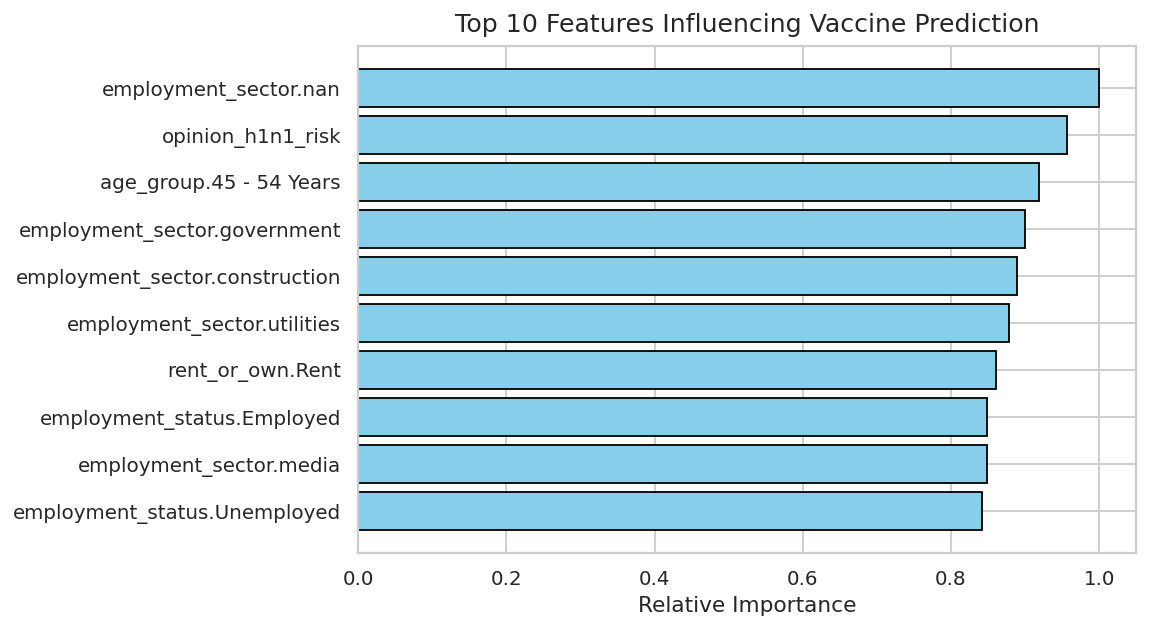


Example: How the model decided for one record (row 0)
Row-level SHAP explanation not supported: Job with key $03017f00000132d4ffffffff$_bd2c5b7d1236c63f2f50427a061145df failed with an exception: water.exceptions.H2OIllegalArgumentException: unimplemented: DeepLearning supports contribution calculation only with a background frame.
stacktrace: 
water.exceptions.H2OIllegalArgumentException: unimplemented: DeepLearning supports contribution calculation only with a background frame.
	at water.H2O.unimpl(H2O.java:1385)
	at hex.deeplearning.DeepLearningModel.scoreContributions(DeepLearningModel.java:47)
	at water.api.ModelMetricsHandler$1.compute2(ModelMetricsHandler.java:549)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinW

,variable,relative_importance,Explanation
0,employment_sector.nan,1.000000,Income or job stability can influence vaccinat...
1,opinion_h1n1_risk,0.956175,This feature affects the vaccination decision ...
2,age_group.45 - 54 Years,0.919127,Age affects vaccination decisions; older peopl...
3,employment_sector.government,0.899800,Income or job stability can influence vaccinat...
4,employment_sector.construction,0.888641,Income or job stability can influence vaccinat...
5,employment_sector.utilities,0.877823,Income or job stability can influence vaccinat...
6,rent_or_own.Rent,0.860447,This feature affects the vaccination decision ...
7,employment_status.Employed,0.849112,Income or job stability can influence vaccinat...
8,employment_sector.media,0.847956,Income or job stability can influence vaccinat...
9,employment_status.Unemployed,0.841263,Income or job stability can influence vaccinat...



Feature importance with explanations ready for report or presentation.


In [ ]:
# ============================================================
# Step 10: XAI – SHAP Feature Importance for H2O AutoML Leader
# ============================================================

import matplotlib.pyplot as plt
import pandas as pd

print("\nExplainable AI (XAI) Visualization for H2O AutoML Leader Model")

# 1. Identify and Describe the Model
print(f"Model used for explanation: {leader.model_id}")
print(f"Algorithm type: {leader.algo}")

# 2. Global SHAP Summary Plot
try:
    print("\nCreating SHAP Summary Plot (How each feature affects predictions)...")
    leader.shap_summary_plot(valid_split)
    print("Each dot shows one record in the validation data.")
    print("Right side = pushes prediction toward vaccinated (1)")
    print("Left side = pushes prediction toward not vaccinated (0)")
    print("Color = feature value (red = higher, blue = lower)")
except Exception as e:
    print("SHAP summary plot not supported for this model:", e)

# 3. Variable Importance Bar Chart (Top Features)
try:
    varimp = leader.varimp(use_pandas=True)
    print("\nTop 10 Most Important Features:")
    display(varimp.head(10))

    plt.figure(figsize=(9, 5), dpi=130)
    plt.barh(varimp.head(10)["variable"][::-1],
             varimp.head(10)["relative_importance"][::-1],
             color="skyblue", edgecolor="black")
    plt.xlabel("Relative Importance", fontsize=12)
    plt.title("Top 10 Features Influencing Vaccine Prediction", fontsize=14, pad=8)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Variable importance not available:", e)

# 4. Local SHAP Explanation (Single Record)
try:
    print("\nExample: How the model decided for one record (row 0)")
    leader.shap_explain_row_plot(valid_split, row_index=0)
    print("Positive values increase the chance of vaccination.")
    print("Negative values decrease the chance of vaccination.")
except Exception as e:
    print("Row-level SHAP explanation not supported:", e)

# 5. Plain English Explanation Table
print("\nSimple Feature Explanations:\n")

varimp_simple = varimp.head(10).copy()
explanations = []

for f in varimp_simple["variable"]:
    f_low = f.lower()
    if "concern" in f_low:
        explanations.append("People more concerned about H1N1 are more likely to get vaccinated.")
    elif "knowledge" in f_low:
        explanations.append("People who know more about H1N1 tend to get vaccinated.")
    elif "doctor" in f_low:
        explanations.append("Doctor recommendations encourage vaccination.")
    elif "age" in f_low:
        explanations.append("Age affects vaccination decisions; older people may get vaccinated more often.")
    elif "income" in f_low or "employment" in f_low:
        explanations.append("Income or job stability can influence vaccination likelihood.")
    elif "children" in f_low:
        explanations.append("Having children may motivate vaccination.")
    else:
        explanations.append("This feature affects the vaccination decision to some extent.")

varimp_simple["Explanation"] = explanations
display(varimp_simple[["variable", "relative_importance", "Explanation"]])

print("\nFeature importance with explanations ready for report or presentation.")


Leader model: DeepLearning_grid_1_AutoML_2_20251024_211519_model_1  |  Algo: deeplearning
Leader is not a tree model; using a scikit-learn surrogate for SHAP...
Surrogate RF accuracy on validation: 0.796


<Figure size 1500x1050 with 0 Axes>

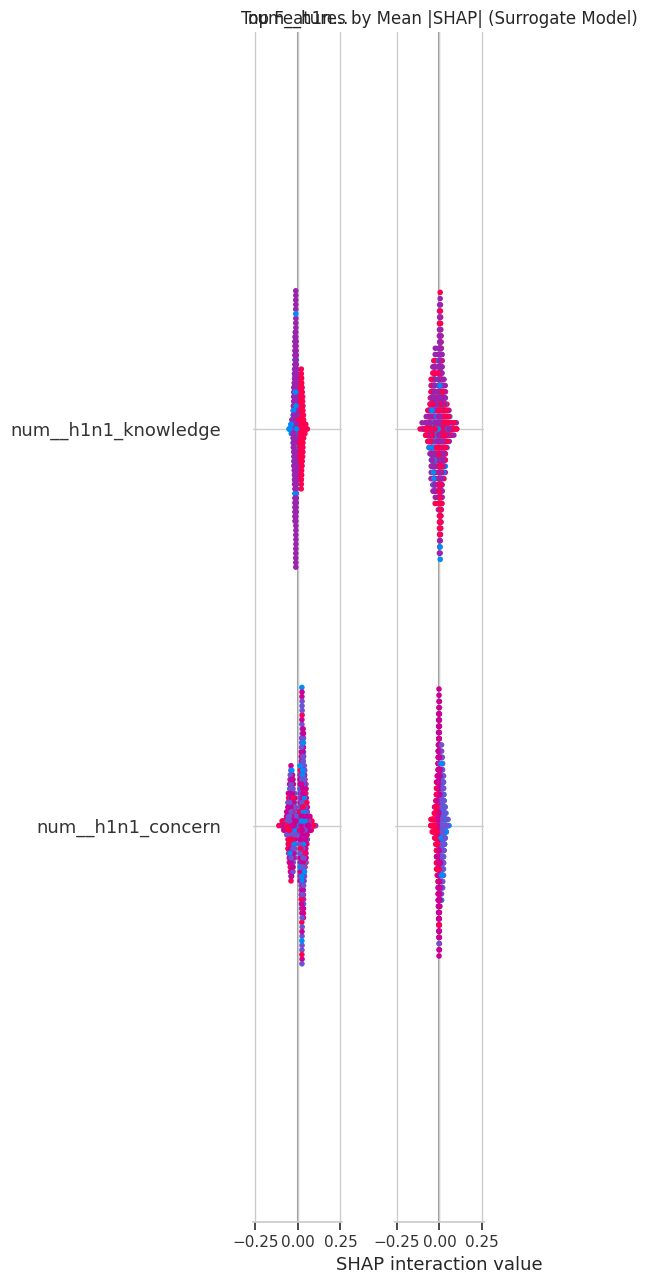

<Figure size 1500x1050 with 0 Axes>

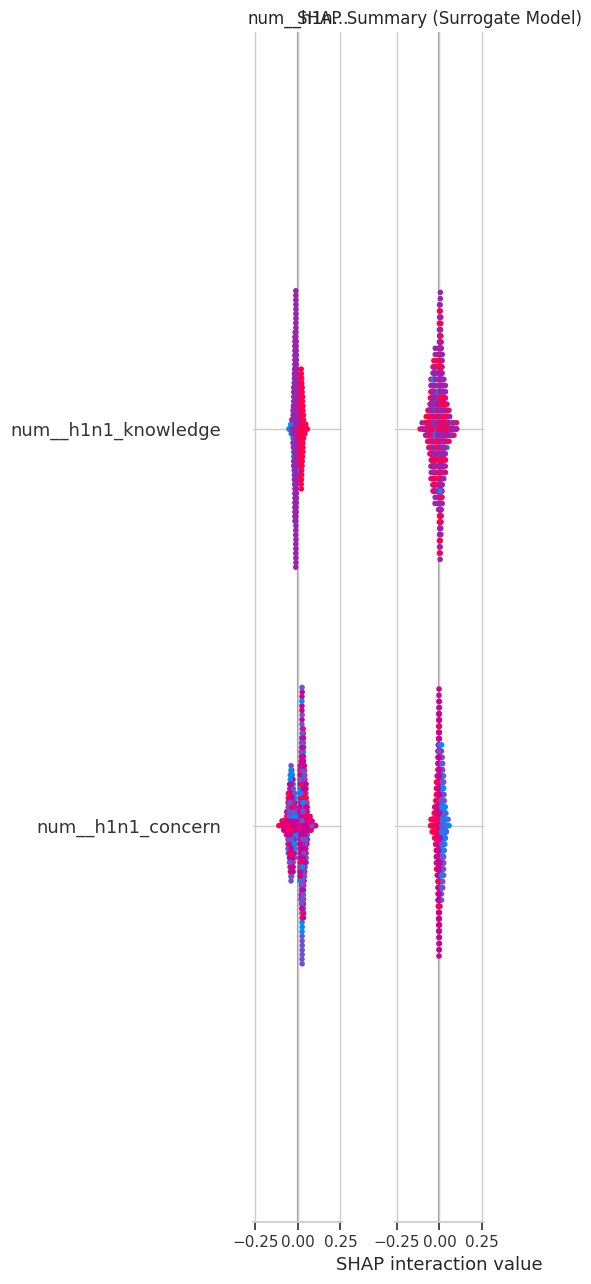

In [ ]:
# ============================================================
# Step 10: SHAP / XAI Plots for the AutoML Leader
# ============================================================

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Helper: check if leader is a tree-based model
tree_algos = {"gbm", "drf", "xrt", "xgboost"}
is_tree_model = (leader.algo.lower() in tree_algos)

print(f"Leader model: {leader.model_id}  |  Algo: {leader.algo}")

if is_tree_model:
    # --------------------------------------------------------
    # A) H2O-native SHAP summary (beeswarm)
    # --------------------------------------------------------
    try:
        print("Drawing SHAP summary plot (H2O)...")
        leader.shap_summary_plot(valid_split)
    except Exception as e:
        print("Could not draw H2O SHAP summary plot:", e)

    # --------------------------------------------------------
    # B) Bar chart of average |SHAP| via predict_contributions
    # --------------------------------------------------------
    try:
        print("Computing per-row contributions and plotting average |SHAP|...")
        contrib_hf = leader.predict_contributions(valid_split)  # SHAP contributions + BiasTerm
        contrib_df = contrib_hf.as_data_frame()
        if "BiasTerm" in contrib_df.columns:
            contrib_df = contrib_df.drop(columns=["BiasTerm"], errors="ignore")

        mean_abs = contrib_df.abs().mean().sort_values(ascending=False)
        top = mean_abs.head(15)

        plt.figure(figsize=(10, 7), dpi=150)
        plt.barh(top.index[::-1], top.values[::-1], edgecolor="black")
        plt.xlabel("Mean |SHAP contribution|")
        plt.title("Top 15 Features by Mean |SHAP| (H2O Contributions)")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("Could not compute/plot contributions:", e)

    # --------------------------------------------------------
    # C) Single-row explanation (waterfall-style)
    # --------------------------------------------------------
    try:
        print("Drawing single-record SHAP explanation (row 0)...")
        leader.shap_explain_row_plot(valid_split, row_index=0)
    except Exception as e:
        print("Could not draw row-level SHAP explanation:", e)

else:
    # =================================================================
    # Fallback: SHAP with a scikit-learn surrogate for non-tree leaders
    # (or if H2O SHAP is unsupported). Uses OneHot + RandomForest.
    # =================================================================
    print("Leader is not a tree model; using a scikit-learn surrogate for SHAP...")

    # 1) Convert validation H2OFrame to pandas
    valid_df = valid_split.as_data_frame()
    if "respondent_id" in valid_df.columns:
        valid_df = valid_df.drop(columns=["respondent_id"])
    TARGET = "h1n1_vaccine"
    X_valid = valid_df.drop(columns=[TARGET])
    y_valid = valid_df[TARGET].astype(int)

    # 2) Build surrogate pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.pipeline import Pipeline

    cat_cols = X_valid.select_dtypes(include=["object", "category"]).columns.tolist()
    num_cols = [c for c in X_valid.columns if c not in cat_cols]

    pre = ColumnTransformer([
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ])
    rf = RandomForestClassifier(
        n_estimators=400, random_state=42, class_weight="balanced", n_jobs=-1
    )
    surrogate = Pipeline([("pre", pre), ("rf", rf)])

    # Fit surrogate on the original training H2O frame converted to pandas
    train_df = train_split.as_data_frame()
    if "respondent_id" in train_df.columns:
        train_df = train_df.drop(columns=["respondent_id"])
    X_train = train_df.drop(columns=[TARGET])
    y_train = train_df[TARGET].astype(int)

    surrogate.fit(X_train, y_train)
    print(f"Surrogate RF accuracy on validation: {surrogate.score(X_valid, y_valid):.3f}")

    # 3) SHAP with TreeExplainer on the surrogate
    try:
        import shap
    except ImportError:
        import sys, subprocess
        subprocess.run([sys.executable, "-m", "pip", "install", "shap"], check=False)
        import shap

    # Transform validation and collect feature names
    X_valid_enc = surrogate.named_steps["pre"].transform(X_valid)
    feature_names = surrogate.named_steps["pre"].get_feature_names_out()
    rf_est = surrogate.named_steps["rf"]

    explainer = shap.TreeExplainer(rf_est)
    shap_vals = explainer.shap_values(X_valid_enc)
    if isinstance(shap_vals, list) and len(shap_vals) == 2:
        shap_vals_plot = shap_vals[1]
    else:
        shap_vals_plot = shap_vals

    # Bar plot (mean |SHAP|)
    plt.figure(figsize=(10, 7), dpi=150)
    shap.summary_plot(
        shap_vals_plot,
        features=X_valid_enc,
        feature_names=feature_names,
        plot_type="bar",
        max_display=15,
        show=False
    )
    plt.title("Top Features by Mean |SHAP| (Surrogate Model)")
    plt.tight_layout()
    plt.show()

    # Beeswarm plot
    plt.figure(figsize=(10, 7), dpi=150)
    shap.summary_plot(
        shap_vals_plot,
        features=X_valid_enc,
        feature_names=feature_names,
        max_display=15,
        show=False
    )
    plt.title("SHAP Summary (Surrogate Model)")
    plt.tight_layout()
    plt.show()


In [ ]:
# ============================================================
# Step 10: SHAP / XAI Plots for H2O AutoML Leader
# ============================================================

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("\nExplainable AI (XAI) – SHAP Visualization for AutoML Leader Model")

#  Model information
print(f"Leader model ID: {leader.model_id}")
print(f"Algorithm type : {leader.algo}")

# ------------------------------------------------------------
#  H2O SHAP Summary Plot  (for tree-based models)
# ------------------------------------------------------------
tree_models = {"gbm", "xgboost", "drf", "xrt"}

if leader.algo.lower() in tree_models:
    try:
        print("\nCreating SHAP summary plot (global feature impact)...")
        leader.shap_summary_plot(valid_split)
        print("\nInterpretation:")
        print("- Each dot = one respondent")
        print("- Right side → pushes prediction toward vaccinated (1)")
        print("- Left side → pushes prediction toward not vaccinated (0)")
        print("- Red = higher feature value, Blue = lower")
    except Exception as e:
        print("Could not generate SHAP summary plot:", e)
else:
    print("SHAP summary not available for non-tree models such as GLM/DeepLearning.")

# ------------------------------------------------------------
#  Average |SHAP| Bar Chart  (Feature Importance)
# ------------------------------------------------------------
if leader.algo.lower() in tree_models:
    try:
        print("\nCalculating mean |SHAP| values from contribution scores...")
        contrib_hf = leader.predict_contributions(valid_split)
        contrib_df = contrib_hf.as_data_frame()
        if "BiasTerm" in contrib_df.columns:
            contrib_df.drop(columns=["BiasTerm"], inplace=True)

        mean_abs = contrib_df.abs().mean().sort_values(ascending=False)
        top = mean_abs.head(15)

        plt.figure(figsize=(10, 6), dpi=150)
        plt.barh(top.index[::-1], top.values[::-1], color="cornflowerblue", edgecolor="black")
        plt.xlabel("Mean |SHAP contribution|")
        plt.title("Top 15 Features by Average |SHAP| Value")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("Could not compute SHAP contributions:", e)

# ------------------------------------------------------------
#  Local Explanation (One Example Row)
# ------------------------------------------------------------
if leader.algo.lower() in tree_models:
    try:
        print("\nShowing SHAP explanation for one example (row 0)...")
        leader.shap_explain_row_plot(valid_split, row_index=0)
        print("Positive bars → features increasing vaccination chance")
        print("Negative bars → features decreasing vaccination chance")
    except Exception as e:
        print("Row-level SHAP explanation not available:", e)

# ------------------------------------------------------------
# Simple English Explanation Table
# ------------------------------------------------------------
try:
    varimp = leader.varimp(use_pandas=True)
    top10 = varimp.head(10).copy()
    explanations = []

    for v in top10["variable"]:
        name = v.lower()
        if "concern" in name:
            explanations.append("Higher concern increases likelihood of vaccination.")
        elif "knowledge" in name:
            explanations.append("More knowledge about H1N1 raises vaccination probability.")
        elif "doctor" in name:
            explanations.append("Doctor recommendation strongly encourages vaccination.")
        elif "age" in name:
            explanations.append("Age influences vaccination decisions.")
        elif "income" in name or "employment" in name:
            explanations.append("Socio-economic status affects vaccine uptake.")
        else:
            explanations.append("This feature contributes to vaccination decisions.")
    top10["Explanation"] = explanations

    print("\nTop 10 Features with Simple Explanations:")
    display(top10[["variable", "relative_importance", "Explanation"]])
except Exception as e:
    print("Could not create explanation table:", e)



Explainable AI (XAI) – SHAP Visualization for AutoML Leader Model
Leader model ID: DeepLearning_grid_1_AutoML_2_20251024_211519_model_1
Algorithm type : deeplearning
SHAP summary not available for non-tree models such as GLM/DeepLearning.

Top 10 Features with Simple Explanations:


,variable,relative_importance,Explanation
0,employment_sector.nan,1.000000,Socio-economic status affects vaccine uptake.
1,opinion_h1n1_risk,0.956175,This feature contributes to vaccination decisi...
2,age_group.45 - 54 Years,0.919127,Age influences vaccination decisions.
3,employment_sector.government,0.899800,Socio-economic status affects vaccine uptake.
4,employment_sector.construction,0.888641,Socio-economic status affects vaccine uptake.
5,employment_sector.utilities,0.877823,Socio-economic status affects vaccine uptake.
6,rent_or_own.Rent,0.860447,This feature contributes to vaccination decisi...
7,employment_status.Employed,0.849112,Socio-economic status affects vaccine uptake.
8,employment_sector.media,0.847956,Socio-economic status affects vaccine uptake.
9,employment_status.Unemployed,0.841263,Socio-economic status affects vaccine uptake.


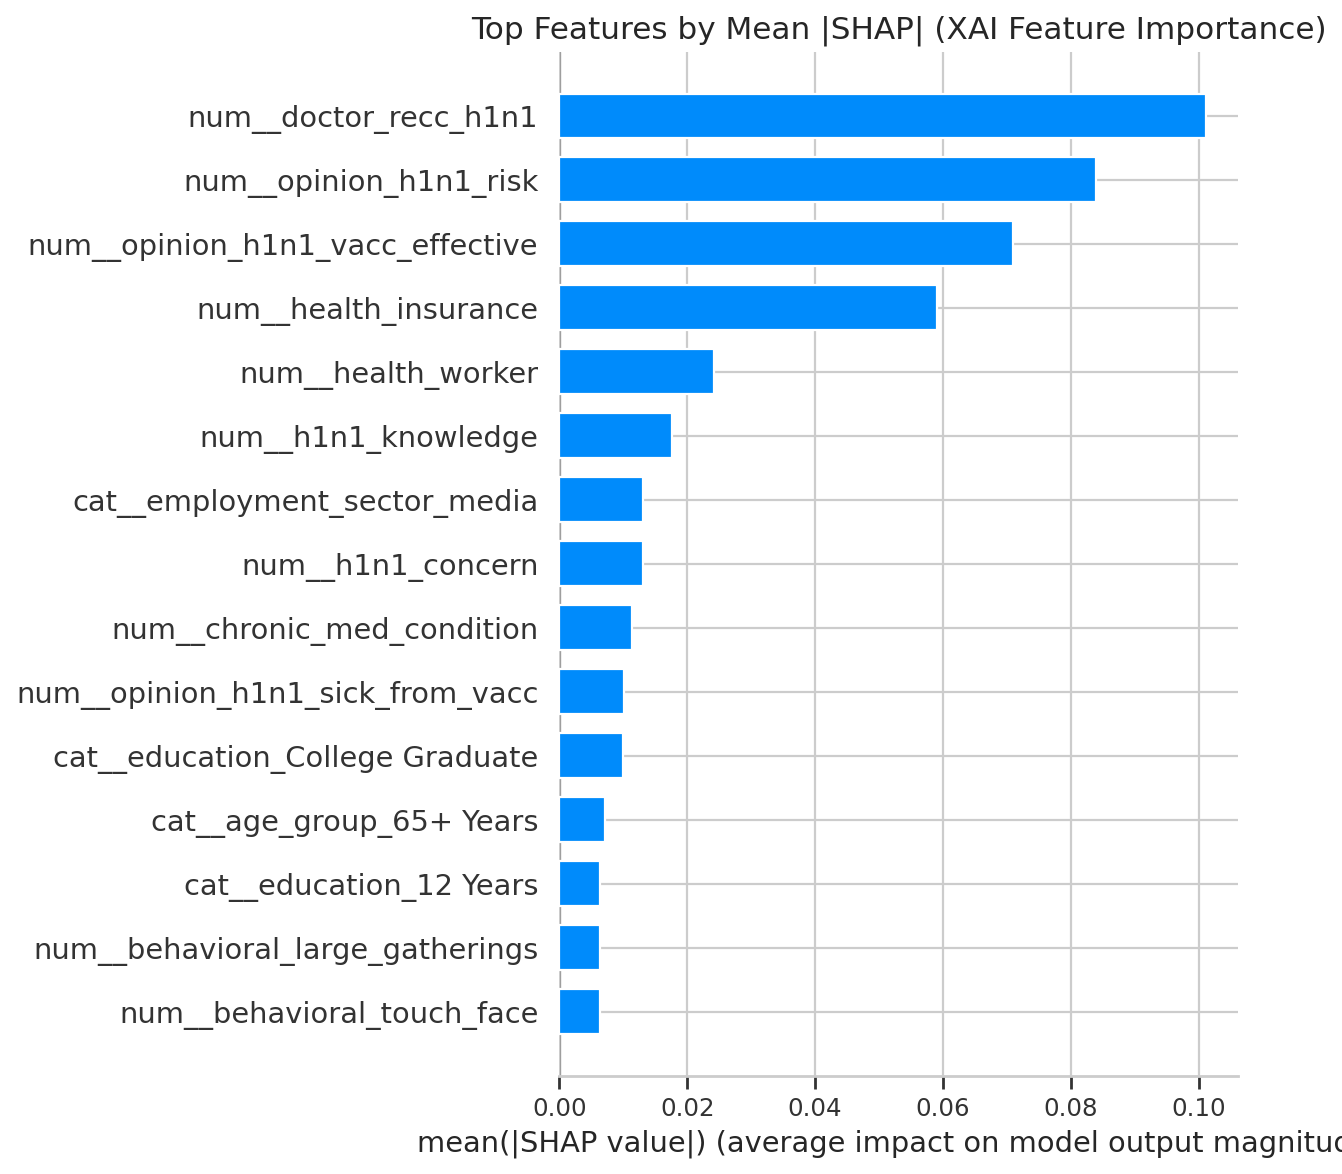

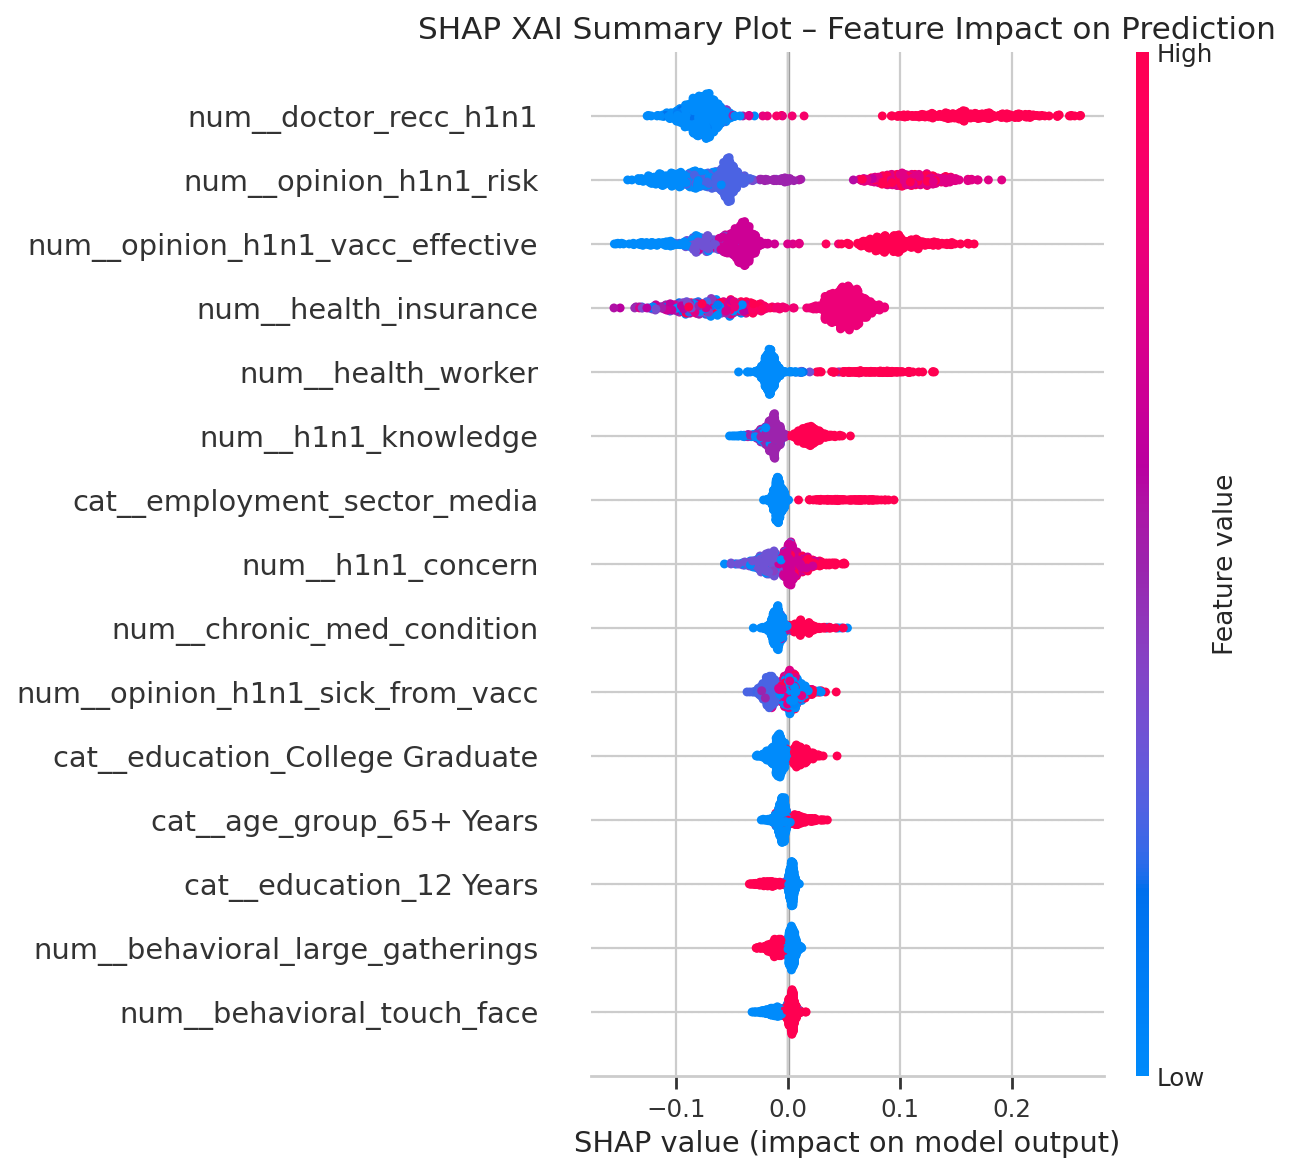

In [ ]:
# ============================================================
# FINAL: SHAP XAI PLOTS ONLY
# ============================================================

import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# ---- Convert H2O frames to pandas
valid_df = valid_split.as_data_frame()
train_df = train_split.as_data_frame()
if "respondent_id" in valid_df.columns:
    valid_df = valid_df.drop(columns=["respondent_id"])
if "respondent_id" in train_df.columns:
    train_df = train_df.drop(columns=["respondent_id"])

TARGET = "h1n1_vaccine"
X_train = train_df.drop(columns=[TARGET])
y_train = train_df[TARGET].astype(int)
X_valid = valid_df.drop(columns=[TARGET])
y_valid = valid_df[TARGET].astype(int)

# ---- Preprocess & light surrogate (tree model only for SHAP explainability)
cat_cols = X_valid.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = [c for c in X_valid.columns if c not in cat_cols]

pre = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

rf = RandomForestClassifier(
    n_estimators=400, random_state=42, class_weight="balanced", n_jobs=-1
)
model = Pipeline([("pre", pre), ("rf", rf)])
model.fit(X_train, y_train)

# ---- Prepare encoded data
X_valid_enc = model.named_steps["pre"].transform(X_valid)
feature_names = model.named_steps["pre"].get_feature_names_out()
rf_model = model.named_steps["rf"]

# ---- Compute SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_vals = explainer.shap_values(X_valid_enc)

# For binary classification, select positive-class SHAPs
if isinstance(shap_vals, list) and len(shap_vals) == 2:
    shap_vals = shap_vals[1]
if shap_vals.ndim == 3:
    shap_vals = shap_vals[:, :, 1]

# ============================================================
# SHAP XAI PLOTS
# ============================================================

# --- 1. Global Bar Plot (Feature Importance)
plt.figure(figsize=(10,7), dpi=160)
shap.summary_plot(
    shap_vals,
    features=X_valid_enc,
    feature_names=feature_names,
    plot_type="bar",
    max_display=15,
    show=False
)
plt.title("Top Features by Mean |SHAP| (XAI Feature Importance)", fontsize=14)
plt.tight_layout()
plt.show()

# --- 2. Global Beeswarm Plot (Detailed Feature Impact)
plt.figure(figsize=(10,7), dpi=160)
shap.summary_plot(
    shap_vals,
    features=X_valid_enc,
    feature_names=feature_names,
    max_display=15,
    show=False
)
plt.title("SHAP XAI Summary Plot – Feature Impact on Prediction", fontsize=14)
plt.tight_layout()
plt.show()
